# Tech Challenge | Fase 1 | pós IA para DEVs

## Silvio Sales do Nascimento Junior (RM 353303)

* Segue link contendo vídeo explicando o trabalho: **inserir link da gravação aqui** *

* Importações necessárias *

In [1]:
import pygame
from pygame.locals import *
import random
import itertools
from algoritmos_geneticos import *
from draw_functions import *
import sys
import numpy as np
import pygame
from benchmark_att48 import *

pygame 2.6.0 (SDL 2.28.4, Python 3.12.2)
Hello from the pygame community. https://www.pygame.org/contribute.html


**Setando valores para o Pygame**

In [2]:
WIDTH, HEIGHT = 800, 400
NODE_RADIUS = 10
FPS = 30
PLOT_X_OFFSET = 450

**Setando valores para o GA (genetic_algorithm.py)**

In [3]:
N_PONTOS_ONIBUS = 15
POPULATION_SIZE = 200
N_GENERATIONS = None
MUTATION_PROBABILITY = 0.5

**Setando cores para os gráficos do PyGame**

In [4]:
WHITE = (255, 255, 255)
BLACK = (0, 0, 0)
RED = (255, 0, 0)
BLUE = (0, 0, 255)
YELLOW = (255, 255, 0)

### **Iniciando o problema**

Melhor rota para um ônibus escolar percorrer os pontos:

* O ônibus deve percorrer TODOS os pontos que embarcam estudantes.
* Só deve passar UMA ÚNICA VEZ pelo ponto.
* Deve fazer o percurso MAIS RÁPIDO POSSÍVEL.

**Geração aleatória dos pontos de acordo com o tamanho do cenário no Pygame e com a quantidade definida para GA.**

In [5]:
# pontos_onibus_locations = [(random.randint(NODE_RADIUS + PLOT_X_OFFSET, WIDTH - NODE_RADIUS), random.randint(NODE_RADIUS, HEIGHT - NODE_RADIUS))
#                    for _ in range(N_PONTOS_ONIBUS)]

**Para fixar/padronizar os pontos de ônibus sempre que rodar**

In [6]:
 WIDTH, HEIGHT = 800, 400
 pontos_onibus_locations = default_problems[15]

**Controles de inicialização do Pygame**

In [7]:
pygame.init()
screen = pygame.display.set_mode((WIDTH, HEIGHT))
pygame.display.set_caption("Problema das paradas de ônibus")
clock = pygame.time.Clock()
generation_counter = itertools.count(start=1)  # Start the counter at 1

**Inicializamos a população com valores aleatórios**

In [8]:
population = generate_random_population(pontos_onibus_locations, POPULATION_SIZE)
best_fitness_values = []
best_solutions = []

NameError: name 'pontos_onibus_locations' is not defined

: 

**Fluxo principal do algoritmo, contendo as condições de término**

In [ ]:

running = True
while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
        elif event.type == pygame.KEYDOWN:
            if event.key == pygame.K_q:
                running = False

    # contador das gerações
    generation = next(generation_counter)

    screen.fill(WHITE)

    # cálculo do Fitness (quão perto está de atingir o objetivo)     
    population_fitness = [calculate_fitness(
        individual) for individual in population]

    # ordenação dos indivíduos pelo valor do fitness
    population, population_fitness = sort_population(
        population,  population_fitness)

    # salvamos os melhores indivíduso da população
    best_fitness = calculate_fitness(population[0])
    best_solution = population[0]

    best_fitness_values.append(best_fitness)
    best_solutions.append(best_solution)

    # plotamos todos os desenhos na tela
    draw_plot(screen, list(range(len(best_fitness_values))),
              best_fitness_values, y_label="Fitness - Distance (pxls)")

    draw_pontos_onibus(screen, pontos_onibus_locations, YELLOW, NODE_RADIUS)
    draw_paths(screen, best_solution, BLUE, width=3)
    draw_paths(screen, population[1], rgb_color=(128, 128, 128), width=1)

    print(f"Generation {generation}: Best fitness = {round(best_fitness, 2)}")

    # fazemos a substituição da população atual para a nova população 
    # Salvamos o melhor individuo da população (Elitismo) para preservar ao longo da população gerada nas gerações.
    new_population = [population[0]]

    # entramos em um looping, vamos permanecer nele até que geramos indivíduos suficiente para completar o tamanho da população (POPULATION_SIZE).
    while len(new_population) < POPULATION_SIZE:

        # método de seleção é o da probabilidade em função do tamanho
        # quanto menor a distância do trajeto maior a chances do individuo ser sorteado
        probability = 1 / np.array(population_fitness)
        parent1, parent2 = random.choices(population, weights=probability, k=2)

        # MÉTODO DE SELEÇÃO DE TORNEIO
        # seleção simples baseada nas 10 melhores soluções
        # parent1, parent2 = random.choices(population[:10], k=2)     

        # fazemos o cruzamento, utilizando order_crossover
        child1 = order_crossover(parent1, parent1)

        # mutação de swap simples
        child1 = mutate(child1, MUTATION_PROBABILITY)

        # adicionamos o nome indivíduo a população
        new_population.append(child1)

    # substituímos população pela nova população
    population = new_population

    pygame.display.flip()
    clock.tick(FPS)




**Encerrando**

pygame.quit()
sys.exit()

# Conclusão

**Na Geração 100 ele chega a um best fitness estabilizado de 1256 pixel de distância percorrido.**

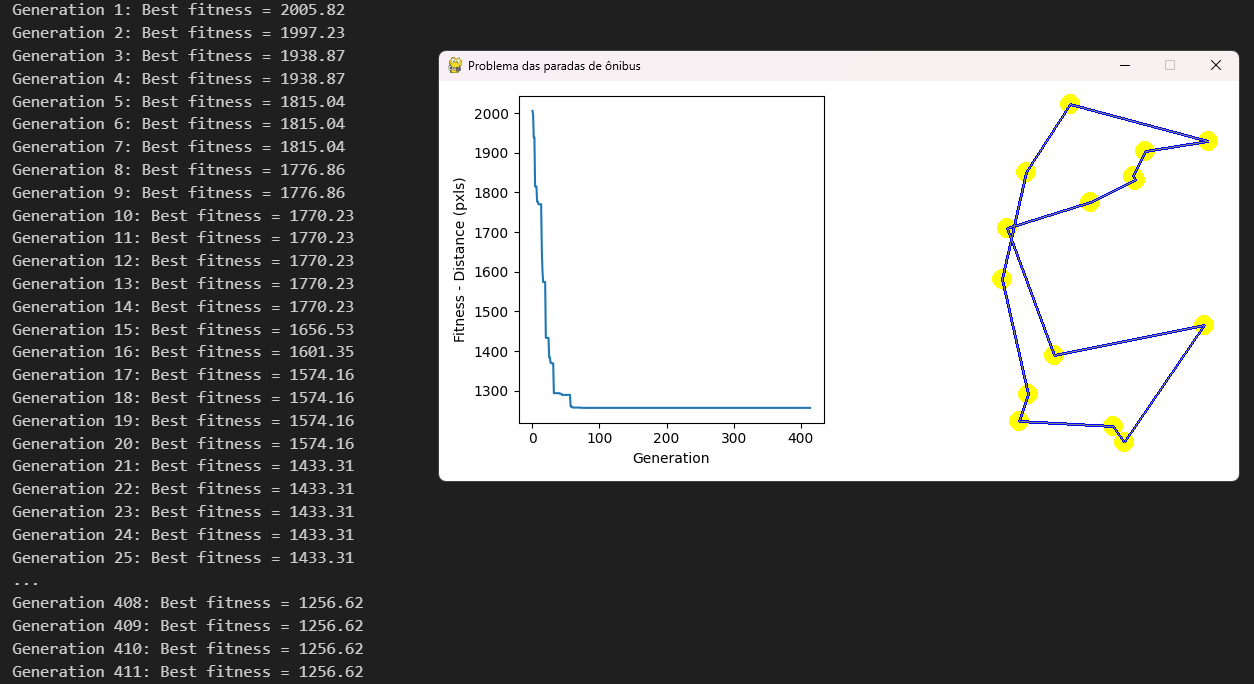